In [1]:
#libraries which are required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import warnings
import sklearn
from sklearn import linear_model
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data(csv) file
df=pd.read_csv("db.csv")

In [3]:
df.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,LAYER_NO,LAYER_TYPE,LAYER_TYPE_EXP,PROJECT_LAYER_CODE,MATL_CODE_EXP,MATL_CODE,...,AASHTO_SOIL_CLASS,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
0,8,Colorado,7783,2,3,GB,Unbound (granular) base,NaN,Crushed Gravel,304,...,502,2.686,137,6,14.1,964.006002,0.6079,-0.1171,0.35,0.050540
1,8,Colorado,7783,3,1,SS,Subgrade (untreated),NaN,Coarse-Grained Soil: Clayey Sand,216,...,512,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
2,8,Colorado,7783,3,2,GS,Unbound (granular) subbase,NaN,Gravel (Uncrushed),302,...,502,2.686,134,7,11.2,964.006002,0.6079,-0.1171,0.35,0.050540
3,8,Colorado,7783,3,3,GB,Unbound (granular) base,NaN,Crushed Gravel,304,...,502,2.686,137,6,11.2,964.006002,0.6079,-0.1171,0.35,0.050540
4,8,Colorado,9019,1,1,SS,Subgrade (untreated),NaN,Coarse-Grained Soil: Clayey Sand with Gravel,217,...,506,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585


In [4]:
#delete some columns from dataframe
df=df.drop(['STATE_CODE','SHRP_ID','CONSTRUCTION_NO','LAYER_NO','LAYER_TYPE','PROJECT_LAYER_CODE','MATL_CODE','DESCRIPTION','AASHTO_SOIL_CLASS_EXP','AASHTO_SOIL_CLASS'], axis=1)
df.head()

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
0,Colorado,Unbound (granular) base,Crushed Gravel,5.9,Base Layer,100.0,100.0,100.0,100.0,99.5,...,NaN,2.686,137,6,14.1,964.006002,0.6079,-0.1171,0.35,0.050540
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
2,Colorado,Unbound (granular) subbase,Gravel (Uncrushed),16.3,Subbase Layer,100.0,89.5,76.0,70.0,62.5,...,NaN,2.686,134,7,11.2,964.006002,0.6079,-0.1171,0.35,0.050540
3,Colorado,Unbound (granular) base,Crushed Gravel,5.9,Base Layer,100.0,100.0,100.0,100.0,99.5,...,NaN,2.686,137,6,11.2,964.006002,0.6079,-0.1171,0.35,0.050540
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585


In [5]:
index_def1=df[df['DESCRIPTION_EXP']=='Base Layer'].index

In [6]:
df=df.drop(index_def1)

In [7]:
df

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.900000,238.775557,0.1095,-2.4187,0.35,0.000019
2,Colorado,Unbound (granular) subbase,Gravel (Uncrushed),16.3,Subbase Layer,100.0,89.5,76.0,70.0,62.5,...,NaN,2.686,134,7,11.200000,964.006002,0.6079,-0.1171,0.35,0.050540
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.100000,572.633817,0.3444,-1.0186,0.35,0.000585
6,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.700000,1007.577804,0.1606,-0.7769,0.35,0.000008
8,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.700000,1007.577804,0.1606,-0.7769,0.35,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,Florida,Unbound (granular) subbase,Soil-Aggregate Mixture (Predominantly Coarse-G...,17.0,Subbase Layer,100.0,100.0,100.0,97.0,93.0,...,NaN,2.593,117,8,19.299999,930.141727,0.7286,-0.3382,0.35,0.003777
15405,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.700000,661.345166,0.4575,0.0809,0.35,0.003777
15406,Florida,Unbound (granular) subbase,Soil-Aggregate Mixture (Predominantly Coarse-G...,17.0,Subbase Layer,100.0,100.0,100.0,97.0,93.0,...,NaN,2.593,117,8,13.300000,930.141727,0.7286,-0.3382,0.35,0.003777
15408,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.700000,661.345166,0.4575,0.0809,0.35,0.003777


In [8]:
index_def2=df[df['DESCRIPTION_EXP']=='Subbase Layer'].index
df2=df.drop(index_def2)
df2

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585
6,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
8,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
10,Connecticut,Subgrade (untreated),Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,Subgrade,100.0,100.0,100.0,97.5,96.5,...,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.35,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15396,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15399,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15402,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15405,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.7,661.345166,0.4575,0.0809,0.35,0.003777


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 15408
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          8141 non-null   object 
 1   LAYER_TYPE_EXP          8141 non-null   object 
 2   MATL_CODE_EXP           8141 non-null   object 
 3   REPR_THICKNESS          1112 non-null   float64
 4   DESCRIPTION_EXP         8141 non-null   object 
 5   THREE_PASSING           8141 non-null   float64
 6   TWO_PASSING             8141 non-null   float64
 7   ONE_AND_HALF_PASSING    8141 non-null   float64
 8   ONE_PASSING             8141 non-null   float64
 9   THREE_FOURTHS_PASSING   8141 non-null   float64
 10  ONE_HALF_PASSING        8092 non-null   float64
 11  THREE_EIGHTHS_PASSING   8141 non-null   float64
 12  NO_4_PASSING            8141 non-null   float64
 13  NO_10_PASSING           8141 non-null   float64
 14  NO_40_PASSING           8141 non-null  

In [10]:
new_value=10
df2.loc[df2['REPR_THICKNESS'].notnull(), 'REPR_THICKNESS'] = new_value
df2

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585
6,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
8,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
10,Connecticut,Subgrade (untreated),Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,Subgrade,100.0,100.0,100.0,97.5,96.5,...,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.35,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15396,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15399,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15402,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15405,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.7,661.345166,0.4575,0.0809,0.35,0.003777


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 15408
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          8141 non-null   object 
 1   LAYER_TYPE_EXP          8141 non-null   object 
 2   MATL_CODE_EXP           8141 non-null   object 
 3   REPR_THICKNESS          1112 non-null   float64
 4   DESCRIPTION_EXP         8141 non-null   object 
 5   THREE_PASSING           8141 non-null   float64
 6   TWO_PASSING             8141 non-null   float64
 7   ONE_AND_HALF_PASSING    8141 non-null   float64
 8   ONE_PASSING             8141 non-null   float64
 9   THREE_FOURTHS_PASSING   8141 non-null   float64
 10  ONE_HALF_PASSING        8092 non-null   float64
 11  THREE_EIGHTHS_PASSING   8141 non-null   float64
 12  NO_4_PASSING            8141 non-null   float64
 13  NO_10_PASSING           8141 non-null   float64
 14  NO_40_PASSING           8141 non-null  

In [12]:
value_to_drop=10
df2 = df2[df2['REPR_THICKNESS'] != value_to_drop]
df2.head()

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585
6,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
8,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
10,Connecticut,Subgrade (untreated),Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,Subgrade,100.0,100.0,100.0,97.5,96.5,...,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.35,0.000008


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 1 to 15408
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   LAYER_TYPE_EXP          7029 non-null   object 
 2   MATL_CODE_EXP           7029 non-null   object 
 3   REPR_THICKNESS          0 non-null      float64
 4   DESCRIPTION_EXP         7029 non-null   object 
 5   THREE_PASSING           7029 non-null   float64
 6   TWO_PASSING             7029 non-null   float64
 7   ONE_AND_HALF_PASSING    7029 non-null   float64
 8   ONE_PASSING             7029 non-null   float64
 9   THREE_FOURTHS_PASSING   7029 non-null   float64
 10  ONE_HALF_PASSING        6980 non-null   float64
 11  THREE_EIGHTHS_PASSING   7029 non-null   float64
 12  NO_4_PASSING            7029 non-null   float64
 13  NO_10_PASSING           7029 non-null   float64
 14  NO_40_PASSING           7029 non-null  

In [14]:
df2['PLASTICITY_INDEX'] = df2['PLASTICITY_INDEX'].fillna(df2['LIQUID_LIMIT'] - df2['PLASTIC_LIMIT'])
df2

,STATE_CODE_EXP,LAYER_TYPE_EXP,MATL_CODE_EXP,REPR_THICKNESS,DESCRIPTION_EXP,THREE_PASSING,TWO_PASSING,ONE_AND_HALF_PASSING,ONE_PASSING,THREE_FOURTHS_PASSING,...,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,POISSONS_RATIO,HYDRAULIC_CONDUCTIVITY
1,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.35,0.000019
4,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand with Gravel,NaN,Subgrade,100.0,100.0,100.0,99.0,96.5,...,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.35,0.000585
6,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
8,Colorado,Subgrade (untreated),Coarse-Grained Soil: Clayey Sand,NaN,Subgrade,100.0,100.0,100.0,99.0,99.0,...,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.35,0.000008
10,Connecticut,Subgrade (untreated),Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,Subgrade,100.0,100.0,100.0,97.5,96.5,...,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.35,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15396,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15399,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15402,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.8,661.345166,0.4575,0.0809,0.35,0.003777
15405,Florida,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,NaN,Subgrade,100.0,100.0,100.0,100.0,100.0,...,NaN,2.663,106,12,7.7,661.345166,0.4575,0.0809,0.35,0.003777


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 1 to 15408
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   LAYER_TYPE_EXP          7029 non-null   object 
 2   MATL_CODE_EXP           7029 non-null   object 
 3   REPR_THICKNESS          0 non-null      float64
 4   DESCRIPTION_EXP         7029 non-null   object 
 5   THREE_PASSING           7029 non-null   float64
 6   TWO_PASSING             7029 non-null   float64
 7   ONE_AND_HALF_PASSING    7029 non-null   float64
 8   ONE_PASSING             7029 non-null   float64
 9   THREE_FOURTHS_PASSING   7029 non-null   float64
 10  ONE_HALF_PASSING        6980 non-null   float64
 11  THREE_EIGHTHS_PASSING   7029 non-null   float64
 12  NO_4_PASSING            7029 non-null   float64
 13  NO_10_PASSING           7029 non-null   float64
 14  NO_40_PASSING           7029 non-null  

In [16]:
df2=df2.drop(['LAYER_TYPE_EXP','DESCRIPTION_EXP','THREE_PASSING','TWO_PASSING','ONE_AND_HALF_PASSING','ONE_PASSING','THREE_FOURTHS_PASSING','ONE_HALF_PASSING','THREE_EIGHTHS_PASSING','POISSONS_RATIO'], axis=1)
df2.head()

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
1,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,97.0,95.0,93.0,87.0,72.500000,29.0,17.0,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.000019
4,Colorado,Coarse-Grained Soil: Clayey Sand with Gravel,NaN,59.5,56.5,50.0,46.5,27.299999,26.0,16.0,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.000585
6,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
8,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
10,Connecticut,Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,88.5,85.5,73.5,64.0,54.299999,24.0,20.0,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.000008


In [17]:
df2.describe(include="all")

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
count,7029,7029,0.0,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,5131.000000,5057.000000,4991.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000
unique,58,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Texas,Coarse-Grained Soil: Silty Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,527,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,88.302561,83.866653,72.256651,57.200156,44.719889,31.577860,17.735416,14.082148,2.695310,115.974250,13.211837,10.098933,853.926352,0.405789,-1.209176,0.002436
std,NaN,NaN,NaN,15.956713,19.310830,23.566902,26.530779,28.707126,11.891482,4.359488,10.324459,0.041657,9.653961,4.031139,3.542897,271.122637,0.194445,0.877841,0.009519
min,NaN,NaN,NaN,20.000000,17.000000,10.000000,2.000000,0.200000,0.000000,0.000000,-6.000000,2.535000,85.000000,6.000000,1.900000,178.660061,-0.353500,-4.694300,0.000000
25%,NaN,NaN,NaN,83.000000,75.000000,56.000000,36.000000,19.900000,24.000000,14.000000,7.000000,2.679000,110.000000,10.000000,7.600000,661.541289,0.254500,-1.699700,0.000008
50%,NaN,NaN,NaN,96.000000,93.000000,79.000000,58.500000,41.599998,29.000000,17.000000,12.000000,2.695000,116.000000,12.000000,9.500000,804.786790,0.388900,-1.231900,0.000019
75%,NaN,NaN,NaN,99.000000,98.000000,91.500000,78.500000,67.699997,37.000000,20.000000,19.000000,2.719000,122.000000,15.000000,12.500000,1023.982791,0.549400,-0.608900,0.000585


In [18]:
mean_LL = df2['LIQUID_LIMIT'].mean()
df2['LIQUID_LIMIT'].fillna(mean_LL, inplace=True)
mean_PL = df2['PLASTIC_LIMIT'].mean()
df2['PLASTIC_LIMIT'].fillna(mean_LL, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 1 to 15408
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   MATL_CODE_EXP           7029 non-null   object 
 2   REPR_THICKNESS          0 non-null      float64
 3   NO_4_PASSING            7029 non-null   float64
 4   NO_10_PASSING           7029 non-null   float64
 5   NO_40_PASSING           7029 non-null   float64
 6   NO_80_PASSING           7029 non-null   float64
 7   NO_200_PASSING          7029 non-null   float64
 8   LIQUID_LIMIT            7029 non-null   float64
 9   PLASTIC_LIMIT           7029 non-null   float64
 10  PLASTICITY_INDEX        4991 non-null   float64
 11  SPEC_GRAVITY            7029 non-null   float64
 12  MAX_LAB_DRY_DENSITY     7029 non-null   int64  
 13  OPTIMUM_LAB_MOISTURE    7029 non-null   int64  
 14  RESILIENT_MODULUS       7029 non-null  

In [19]:
df2['PLASTICITY_INDEX'] = df2['PLASTICITY_INDEX'].fillna(df2['LIQUID_LIMIT'] - df2['PLASTIC_LIMIT'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 1 to 15408
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   MATL_CODE_EXP           7029 non-null   object 
 2   REPR_THICKNESS          0 non-null      float64
 3   NO_4_PASSING            7029 non-null   float64
 4   NO_10_PASSING           7029 non-null   float64
 5   NO_40_PASSING           7029 non-null   float64
 6   NO_80_PASSING           7029 non-null   float64
 7   NO_200_PASSING          7029 non-null   float64
 8   LIQUID_LIMIT            7029 non-null   float64
 9   PLASTIC_LIMIT           7029 non-null   float64
 10  PLASTICITY_INDEX        7029 non-null   float64
 11  SPEC_GRAVITY            7029 non-null   float64
 12  MAX_LAB_DRY_DENSITY     7029 non-null   int64  
 13  OPTIMUM_LAB_MOISTURE    7029 non-null   int64  
 14  RESILIENT_MODULUS       7029 non-null  

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 1 to 15408
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   MATL_CODE_EXP           7029 non-null   object 
 2   REPR_THICKNESS          0 non-null      float64
 3   NO_4_PASSING            7029 non-null   float64
 4   NO_10_PASSING           7029 non-null   float64
 5   NO_40_PASSING           7029 non-null   float64
 6   NO_80_PASSING           7029 non-null   float64
 7   NO_200_PASSING          7029 non-null   float64
 8   LIQUID_LIMIT            7029 non-null   float64
 9   PLASTIC_LIMIT           7029 non-null   float64
 10  PLASTICITY_INDEX        7029 non-null   float64
 11  SPEC_GRAVITY            7029 non-null   float64
 12  MAX_LAB_DRY_DENSITY     7029 non-null   int64  
 13  OPTIMUM_LAB_MOISTURE    7029 non-null   int64  
 14  RESILIENT_MODULUS       7029 non-null  

In [21]:
df2.describe(include="all")

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
count,7029,7029,0.0,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000
unique,58,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Texas,Coarse-Grained Soil: Silty Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,527,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,88.302561,83.866653,72.256651,57.200156,44.719889,31.577860,21.618942,9.958492,2.695310,115.974250,13.211837,10.098933,853.926352,0.405789,-1.209176,0.002436
std,NaN,NaN,NaN,15.956713,19.310830,23.566902,26.530779,28.707126,10.159651,7.235583,11.128195,0.041657,9.653961,4.031139,3.542897,271.122637,0.194445,0.877841,0.009519
min,NaN,NaN,NaN,20.000000,17.000000,10.000000,2.000000,0.200000,0.000000,0.000000,-25.577860,2.535000,85.000000,6.000000,1.900000,178.660061,-0.353500,-4.694300,0.000000
25%,NaN,NaN,NaN,83.000000,75.000000,56.000000,36.000000,19.900000,26.000000,16.000000,0.000000,2.679000,110.000000,10.000000,7.600000,661.541289,0.254500,-1.699700,0.000008
50%,NaN,NaN,NaN,96.000000,93.000000,79.000000,58.500000,41.599998,31.577860,19.000000,8.000000,2.695000,116.000000,12.000000,9.500000,804.786790,0.388900,-1.231900,0.000019
75%,NaN,NaN,NaN,99.000000,98.000000,91.500000,78.500000,67.699997,34.000000,31.577860,15.000000,2.719000,122.000000,15.000000,12.500000,1023.982791,0.549400,-0.608900,0.000585


In [22]:
df2.index = range(1, len(df2) + 1)
df2

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
1,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,97.0,95.0,93.0,87.0,72.500000,29.00000,17.0,12.00000,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.000019
2,Colorado,Coarse-Grained Soil: Clayey Sand with Gravel,NaN,59.5,56.5,50.0,46.5,27.299999,26.00000,16.0,10.00000,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.000585
3,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.00000,17.0,8.00000,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
4,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.00000,17.0,8.00000,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
5,Connecticut,Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,88.5,85.5,73.5,64.0,54.299999,24.00000,20.0,4.00000,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,Florida,Coarse-Grained Soils: Poorly Graded Sand,NaN,100.0,99.0,77.0,17.0,0.500000,31.57786,18.0,13.57786,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.003777
7026,Florida,Coarse-Grained Soils: Poorly Graded Sand,NaN,100.0,99.0,77.0,17.0,0.500000,31.57786,18.0,13.57786,2.663,106,13,7.8,661.345166,0.4575,0.0809,0.003777
7027,Florida,Coarse-Grained Soils: Poorly Graded Sand,NaN,99.0,99.0,77.0,24.0,0.500000,31.57786,23.0,8.57786,2.663,106,12,7.8,661.345166,0.4575,0.0809,0.003777
7028,Florida,Coarse-Grained Soils: Poorly Graded Sand,NaN,99.0,99.0,77.0,24.0,0.500000,31.57786,23.0,8.57786,2.663,106,12,7.7,661.345166,0.4575,0.0809,0.003777


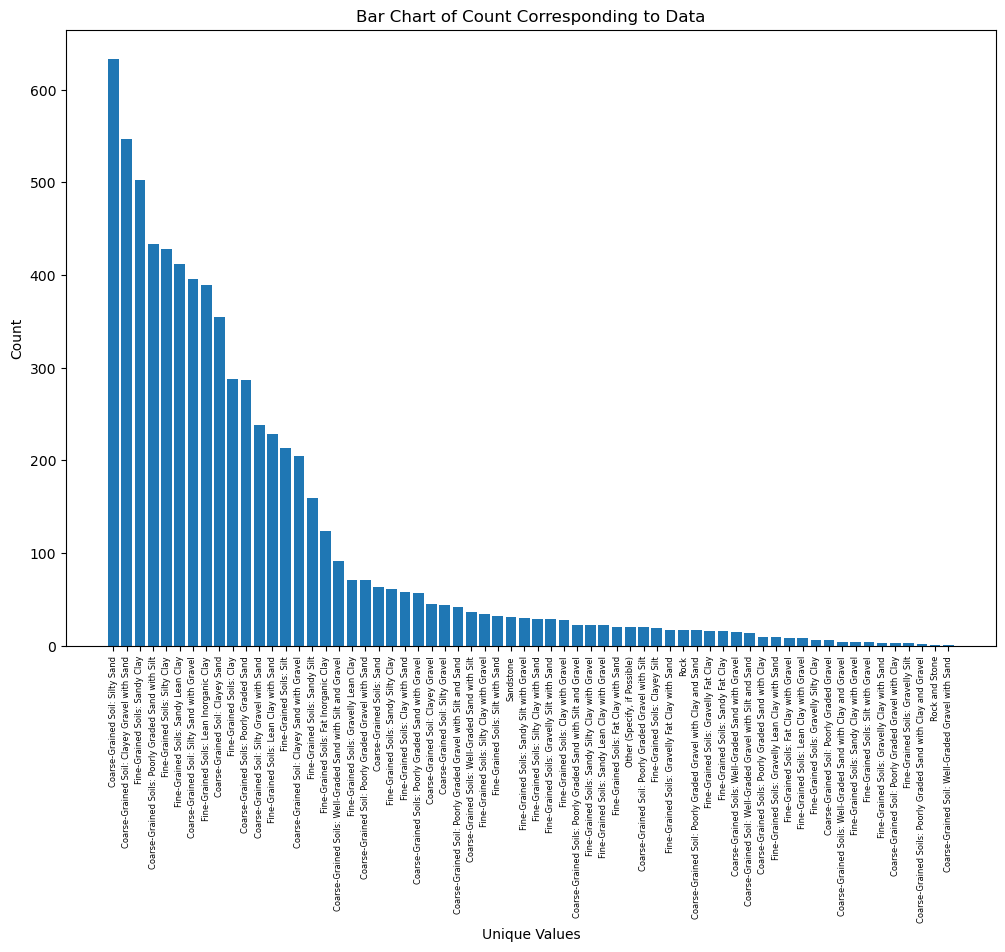

In [23]:
column = df2['MATL_CODE_EXP']

# Count the occurrences of each unique value in the column
value_counts = column.value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Chart of Count Corresponding to Data')
plt.xticks(rotation=90, fontsize=6)  # Rotate x-axis labels if needed
plt.show()

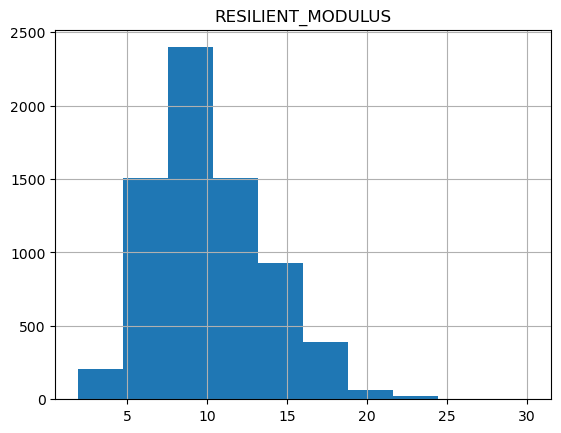

In [24]:
hist=df2.hist('RESILIENT_MODULUS')
plt.show()

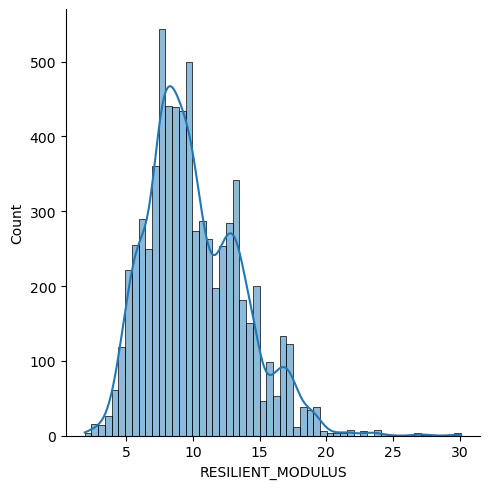

In [25]:
x=df2['RESILIENT_MODULUS']
sns.displot(x, kde=True)

In [26]:
df2.head()

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
1,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,97.0,95.0,93.0,87.0,72.500000,29.0,17.0,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.000019
2,Colorado,Coarse-Grained Soil: Clayey Sand with Gravel,NaN,59.5,56.5,50.0,46.5,27.299999,26.0,16.0,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.000585
3,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
4,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
5,Connecticut,Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,88.5,85.5,73.5,64.0,54.299999,24.0,20.0,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.000008


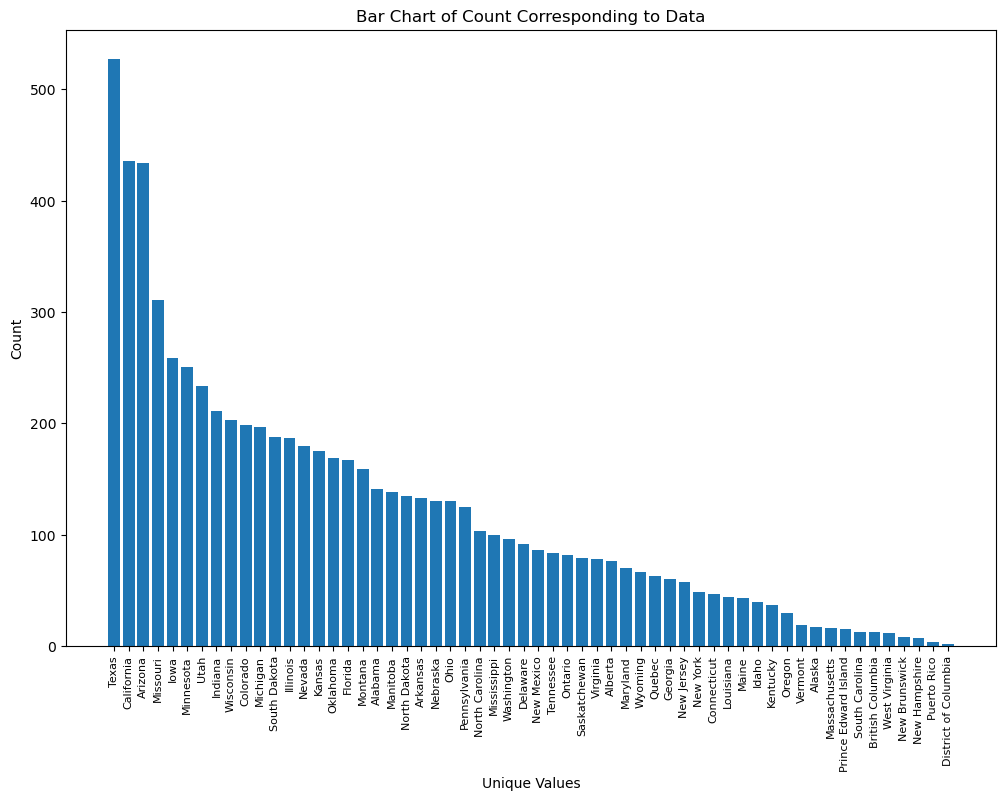

In [27]:
column = df2['STATE_CODE_EXP']

# Count the occurrences of each unique value in the column
value_counts = column.value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Chart of Count Corresponding to Data')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels if needed
plt.show()

In [28]:
df2.head()

,STATE_CODE_EXP,MATL_CODE_EXP,REPR_THICKNESS,NO_4_PASSING,NO_10_PASSING,NO_40_PASSING,NO_80_PASSING,NO_200_PASSING,LIQUID_LIMIT,PLASTIC_LIMIT,PLASTICITY_INDEX,SPEC_GRAVITY,MAX_LAB_DRY_DENSITY,OPTIMUM_LAB_MOISTURE,RESILIENT_MODULUS,RESILIENT_MODULUS_K1,RESILIENT_MODULUS_K2,RESILIENT_MODULUS_K3,HYDRAULIC_CONDUCTIVITY
1,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,97.0,95.0,93.0,87.0,72.500000,29.0,17.0,12.0,2.719,118,13,2.9,238.775557,0.1095,-2.4187,0.000019
2,Colorado,Coarse-Grained Soil: Clayey Sand with Gravel,NaN,59.5,56.5,50.0,46.5,27.299999,26.0,16.0,10.0,2.694,120,12,7.1,572.633817,0.3444,-1.0186,0.000585
3,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
4,Colorado,Coarse-Grained Soil: Clayey Sand,NaN,92.0,89.0,78.0,69.0,53.700001,25.0,17.0,8.0,2.710,121,10,13.7,1007.577804,0.1606,-0.7769,0.000008
5,Connecticut,Coarse-Grained Soils: Well-Graded Sand with Si...,NaN,88.5,85.5,73.5,64.0,54.299999,24.0,20.0,4.0,2.710,111,16,5.6,625.741696,0.7547,-2.5568,0.000008


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 1 to 7029
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE_CODE_EXP          7029 non-null   object 
 1   MATL_CODE_EXP           7029 non-null   object 
 2   REPR_THICKNESS          0 non-null      float64
 3   NO_4_PASSING            7029 non-null   float64
 4   NO_10_PASSING           7029 non-null   float64
 5   NO_40_PASSING           7029 non-null   float64
 6   NO_80_PASSING           7029 non-null   float64
 7   NO_200_PASSING          7029 non-null   float64
 8   LIQUID_LIMIT            7029 non-null   float64
 9   PLASTIC_LIMIT           7029 non-null   float64
 10  PLASTICITY_INDEX        7029 non-null   float64
 11  SPEC_GRAVITY            7029 non-null   float64
 12  MAX_LAB_DRY_DENSITY     7029 non-null   int64  
 13  OPTIMUM_LAB_MOISTURE    7029 non-null   int64  
 14  RESILIENT_MODULUS       7029 non-null   

In [30]:
#sns_plot=sns.pairplot(data=df2)
#sns_plot

In [31]:
df2['MAX_LAB_DRY_DENSITY'] = df2['MAX_LAB_DRY_DENSITY'].astype(float)

In [32]:
df2['OPTIMUM_LAB_MOISTURE'] = df2['OPTIMUM_LAB_MOISTURE'].astype(float)

In [33]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import pearsonr

In [34]:
X = df2.drop(['STATE_CODE_EXP','MATL_CODE_EXP','REPR_THICKNESS','RESILIENT_MODULUS'], axis=1) # Features
y = df2['RESILIENT_MODULUS'] # Target variable


In [35]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 78.5134
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 3.4230
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 2.0096
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 1.4289
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 1.0661
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.7969
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.6761
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.6436
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.5772
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.5064
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.4763
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.4569
Epoch 13/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.3935
Epoch 14/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3977
Epoch 15/50
176/176 ━━━━━━━━

In [40]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Set:", loss)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2578 
Mean Squared Error on Test Set: 0.24676623940467834


In [41]:
# Make predictions
y_pred = model.predict(X_test_scaled)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy:", accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.2578
Accuracy: 0.24676623940467834


In [43]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2:.2f}')

R^2 score: 0.98


In [44]:
# Compute the correlation matrix
correlation_matrix = df2.corr()


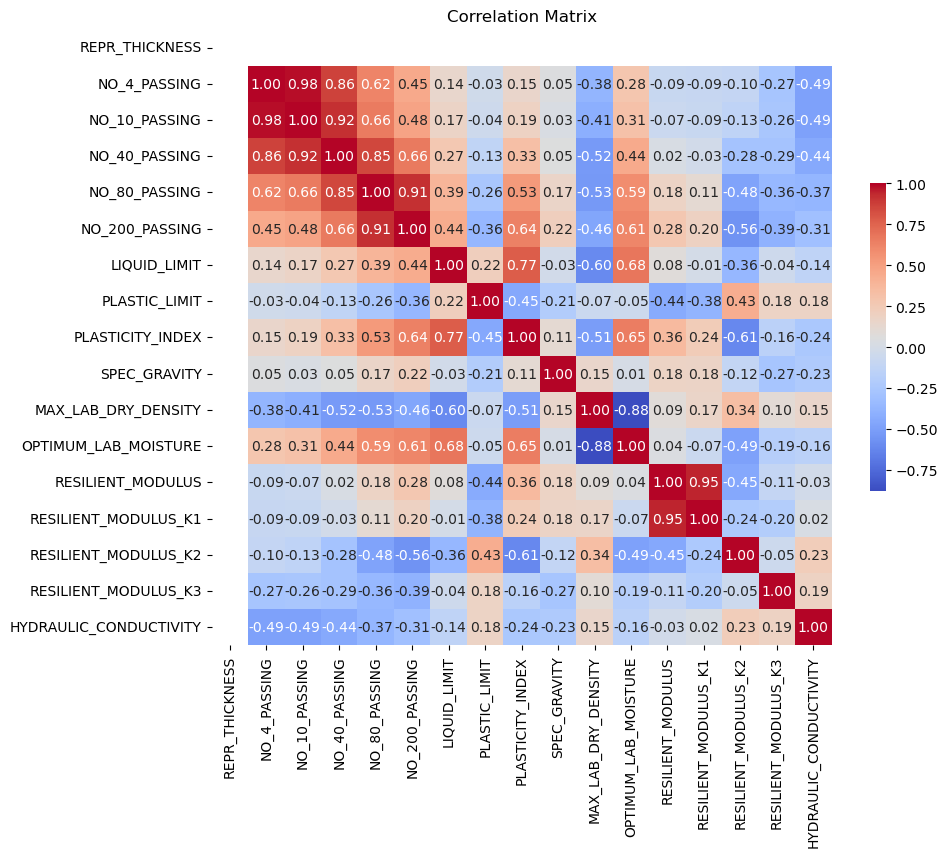

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


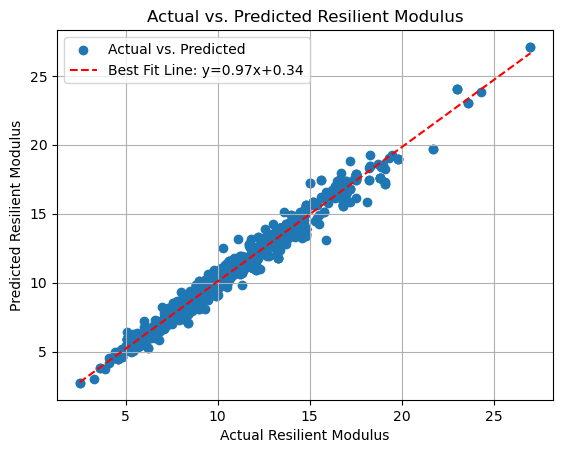

Equation of the best fitting line: y = 0.97x + 0.34


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape y_test and predictions
y_test_reshaped = np.array(y_test).flatten()
predictions_reshaped = np.array(y_pred).flatten()

# Calculate the best fitting line
slope, intercept = np.polyfit(y_test_reshaped, predictions_reshaped, 1)
line_x = np.linspace(min(y_test_reshaped), max(y_test_reshaped), 100)
line_y = slope * line_x + intercept

# Plotting the actual vs. predicted values
plt.scatter(y_test_reshaped, predictions_reshaped, label='Actual vs. Predicted')

# Plotting the best fitting line
plt.plot(line_x, line_y, color='red', linestyle='--', label=f'Best Fit Line: y={slope:.2f}x+{intercept:.2f}')

plt.xlabel('Actual Resilient Modulus')
plt.ylabel('Predicted Resilient Modulus')
plt.title('Actual vs. Predicted Resilient Modulus')
plt.legend()
plt.grid(True)
plt.show()

# Print equation of the best fitting line
print(f"Equation of the best fitting line: y = {slope:.2f}x + {intercept:.2f}")


In [47]:
#Comparing actual prices with predicted prices
compare = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
compare.head(n=15)

,Actual,Predicted
0,14.4,13.902531
1,14.4,14.977459
2,10.6,10.653713
3,6.7,6.840104
4,17.0,16.423574
5,7.9,8.096257
6,16.0,16.115023
7,9.3,9.073178
8,7.9,8.043680
9,9.0,8.383155


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test and y_pred are defined as your actual and predicted values from a regression model
# For example:
# y_test = np.array([3, -0.5, 2, 7])
# y_pred = np.array([2.5, 0.0, 2, 8])

# R-Squared
r_squared = r2_score(y_test, y_pred)
print("R-Squared:", r_squared)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R (Pearson Correlation Coefficient)
r, _ = pearsonr(y_test, y_pred.flatten())
print("Correlation Coefficient (R):", r)


R-Squared: 0.9802918150746862
Root Mean Squared Error (RMSE): 0.49675567940603294
Mean Absolute Error (MAE): 0.3630181701670331
Correlation Coefficient (R): 0.9903696084511705
